# Exercício 2 - CBPF

## Explorando o Notebook

Primeiramente, vamos importar os pacotes necessários.

In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os

A seguir, gera-se uma lista HDU a partir do fits e a tabela a partir da segunda extensão da lista.

In [2]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

        ra                dec         ...        z_spec       training
------------------ ------------------ ... ------------------- --------
219.08289517954503  34.62503563674176 ...               -99.0      0.0
  219.018686653907  34.62537369835652 ...               -99.0      0.0
 218.9763831277981 34.626465741964694 ... 0.20600000023841858      1.0
218.92461988134852  34.62559613136096 ...               -99.0      0.0
219.10422528282172  34.62584794653823 ...               -99.0      0.0
 219.1401551191026  34.63060062779776 ...               -99.0      0.0
219.07940419061788   34.6265108832743 ...               -99.0      0.0
               ...                ... ...                 ...      ...
221.30998851742496  35.03107476388605 ...               -99.0      0.0
221.30899510953466  35.02957290846069 ...               -99.0      0.0
 221.3846269372925  35.03130360684637 ...               -99.0      0.0
221.26710586697644  35.03265425222566 ...               -99.0      0.0
221.35

Em seguida, constrói-se o data frame do pandas a partir da tabela anterior.

In [3]:
df = cat_table.to_pandas()
print(df)

                ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
0       219.082895  34.625036  22.280201  23.840595  20.669277  19.442677   
1       219.018687  34.625374  20.950979  22.239498  20.180450  19.764698   
2       218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
3       218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
4       219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
...            ...        ...        ...        ...        ...        ...   
203479  221.384627  35.031304  20.289848  22.006527  19.473064  18.800829   
203480  221.267106  35.032654  22.278854  24.686527  21.332008  20.327465   
203481  221.357931  35.031956  21.256090  22.794085  20.244637  18.834969   
203482  221.140035  35.031835  20.928772  22.810913  19.648155  18.766457   
203483  221.306115  35.032601  22.024387  23.518301  20.663643  19.733841   

           MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  MAGErr_W1  MAGErr_W

### Adicionar uma coluna ao Dataframe

In [4]:
new_col = "_id" # name new column
df['ra'] = df['ra'].astype(str) # change numbers to string
df['dec'] = df['dec'].astype(str) # change numbers to string
df[new_col] = df['ra'] + df['dec'] # join two columns
print(df)

#Há uma concatenação das strings das duas colunas, em cada linha.

                        ra                 dec      MAG_R      MAG_G  \
0       219.08289517954503   34.62503563674176  22.280201  23.840595   
1         219.018686653907   34.62537369835652  20.950979  22.239498   
2        218.9763831277981  34.626465741964694  18.890739  20.205397   
3       218.92461988134852   34.62559613136096  20.606371  21.781631   
4       219.10422528282172   34.62584794653823  20.372391  21.050526   
...                    ...                 ...        ...        ...   
203479   221.3846269372925   35.03130360684637  20.289848  22.006527   
203480  221.26710586697644   35.03265425222566  22.278854  24.686527   
203481  221.35793083937708    35.0319557953791  21.256090  22.794085   
203482  221.14003466677406  35.031834870454304  20.928772  22.810913   
203483  221.30611517880223  35.032600651235455  22.024387  23.518301   

            MAG_Z     MAG_W1     MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  \
0       20.669277  19.442677  19.876930  16.879316     

### Separando o dataframe em dois

Para o primeiro "pedaço", temos:

In [5]:
print("Daframe 1")
df_1 = df.iloc[:,2:-7] # Aqui, apenas seleciona-se as colunas referentes às magnitudes.
df_1[new_col] = df[new_col] # Aqui, insere-se a coluna ID, definida anteriormente.
print(df_1) 

Daframe 1
            MAG_R      MAG_G      MAG_Z     MAG_W1     MAG_W2     MAG_W3  \
0       22.280201  23.840595  20.669277  19.442677  19.876930  16.879316   
1       20.950979  22.239498  20.180450  19.764698  20.027622  18.840683   
2       18.890739  20.205397  18.109526  18.055065  18.447739        NaN   
3       20.606371  21.781631  19.691599  19.006557  19.443335  20.748812   
4       20.372391  21.050526  20.042389  20.373194  20.973274  19.442488   
...           ...        ...        ...        ...        ...        ...   
203479  20.289848  22.006527  19.473064  18.800829  19.199001  22.347729   
203480  22.278854  24.686527  21.332008  20.327465  21.582365        NaN   
203481  21.256090  22.794085  20.244637  18.834969  19.022402  17.893970   
203482  20.928772  22.810913  19.648155  18.766457  19.179871        NaN   
203483  22.024387  23.518301  20.663643  19.733841  20.518625        NaN   

           MAG_W4  MAGErr_R  MAGErr_G  MAGErr_Z  MAGErr_W1  MAGErr_W2  \
0   

In [6]:
cols1 = df_1.columns.tolist() #Listando as colunas do dataframe.
print(cols1)

['MAG_R', 'MAG_G', 'MAG_Z', 'MAG_W1', 'MAG_W2', 'MAG_W3', 'MAG_W4', 'MAGErr_R', 'MAGErr_G', 'MAGErr_Z', 'MAGErr_W1', 'MAGErr_W2', 'MAGErr_W3', 'MAGErr_W4', '_id']


In [7]:
cols1 = cols1[-1:] + cols1[:-1] #Selecionando a primeira coluna como sendo ID.
print(cols1)

['_id', 'MAG_R', 'MAG_G', 'MAG_Z', 'MAG_W1', 'MAG_W2', 'MAG_W3', 'MAG_W4', 'MAGErr_R', 'MAGErr_G', 'MAGErr_Z', 'MAGErr_W1', 'MAGErr_W2', 'MAGErr_W3', 'MAGErr_W4']


In [8]:
df_1 = df_1[cols1] #Rearranjando as colunas do data frame, para que ID seja a primeira.
print(df_1)
print(df_1.columns.tolist())

                                         _id      MAG_R      MAG_G      MAG_Z  \
0        219.0828951795450334.62503563674176  22.280201  23.840595  20.669277   
1          219.01868665390734.62537369835652  20.950979  22.239498  20.180450   
2        218.976383127798134.626465741964694  18.890739  20.205397  18.109526   
3        218.9246198813485234.62559613136096  20.606371  21.781631  19.691599   
4        219.1042252828217234.62584794653823  20.372391  21.050526  20.042389   
...                                      ...        ...        ...        ...   
203479    221.384626937292535.03130360684637  20.289848  22.006527  19.473064   
203480   221.2671058669764435.03265425222566  22.278854  24.686527  21.332008   
203481    221.3579308393770835.0319557953791  21.256090  22.794085  20.244637   
203482  221.1400346667740635.031834870454304  20.928772  22.810913  19.648155   
203483  221.3061151788022335.032600651235455  22.024387  23.518301  20.663643   

           MAG_W1     MAG_W

Para o segundo "pedaço", temos:

In [9]:
print("********************************")
print("Daframe 2")
df_2 = df.iloc[:,-7:-2] # set photoz columns dataframe 1 from dataframe
df_2[new_col] = df[new_col] # insert ID column
cols2 = df_2.columns.tolist()
cols2 = cols2[-1:] + cols2[:-1] # set first column _id
df_2 = df_2[cols2] # set first column _id
print(df_2)
print(df_2.columns.tolist())

********************************
Daframe 2
                                         _id         z      zErr      zmin  \
0        219.0828951795450334.62503563674176  0.778901  0.080700  0.702562   
1          219.01868665390734.62537369835652  0.335511  0.054689  0.288449   
2        218.976383127798134.626465741964694  0.219682  0.010735  0.209061   
3        218.9246198813485234.62559613136096  0.542923  0.051388  0.485855   
4        219.1042252828217234.62584794653823  0.227206  0.033312  0.191055   
...                                      ...       ...       ...       ...   
203479    221.384626937292535.03130360684637  0.399513  0.029692  0.371137   
203480   221.2671058669764435.03265425222566  0.525794  0.076385  0.445291   
203481    221.3579308393770835.0319557953791  0.497148  0.061960  0.444781   
203482  221.1400346667740635.031834870454304  0.561410  0.034761  0.527032   
203483  221.3061151788022335.032600651235455  0.670019  0.082765  0.608144   

            zmax  z_

### Usando a operação join

In [10]:
DF_mag = df_1.set_index(new_col) #Seleciona o index do dataframe (substituindo o padrão 0,1,2...) pela coluna ID.

In [11]:
DF_mag

,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4
_id,,,,,,,,,,,,,,
219.0828951795450334.62503563674176,22.280201,23.840595,20.669277,19.442677,19.876930,16.879316,NaN,0.068069,0.186609,0.019647,0.030203,0.102416,0.114776,-0.075900
219.01868665390734.62537369835652,20.950979,22.239498,20.180450,19.764698,20.027622,18.840683,NaN,0.020584,0.050908,0.015757,0.040873,0.118477,0.706567,-0.799649
218.976383127798134.626465741964694,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,0.011483,0.003473,0.009083,0.029333,-9.551555,-0.682852
218.9246198813485234.62559613136096,20.606371,21.781631,19.691599,19.006557,19.443335,20.748812,NaN,0.020479,0.043270,0.017061,0.021253,0.071826,4.317370,-0.843075
219.1042252828217234.62584794653823,20.372391,21.050526,20.042389,20.373194,20.973274,19.442488,17.469923,0.018710,0.025214,0.022851,0.078672,0.304236,1.281699,1.788509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221.384626937292535.03130360684637,20.289848,22.006527,19.473064,18.800829,19.199001,22.347729,NaN,0.023790,0.058753,0.023217,0.017453,0.056976,18.655874,-0.504265
221.2671058669764435.03265425222566,22.278854,24.686527,21.332008,20.327465,21.582365,NaN,15.524459,0.155021,0.703358,0.151881,0.070509,0.506848,-0.115952,0.318850
221.3579308393770835.0319557953791,21.256090,22.794085,20.244637,18.834969,19.022402,17.893970,16.110783,0.057986,0.140764,0.046815,0.018522,0.049890,0.324572,0.561515


In [12]:
DF = df_2.join(DF_mag, on=new_col) 
print(DF)
print(DF.columns.tolist())

                                         _id         z      zErr      zmin  \
0        219.0828951795450334.62503563674176  0.778901  0.080700  0.702562   
1          219.01868665390734.62537369835652  0.335511  0.054689  0.288449   
2        218.976383127798134.626465741964694  0.219682  0.010735  0.209061   
3        218.9246198813485234.62559613136096  0.542923  0.051388  0.485855   
4        219.1042252828217234.62584794653823  0.227206  0.033312  0.191055   
...                                      ...       ...       ...       ...   
203479    221.384626937292535.03130360684637  0.399513  0.029692  0.371137   
203480   221.2671058669764435.03265425222566  0.525794  0.076385  0.445291   
203481    221.3579308393770835.0319557953791  0.497148  0.061960  0.444781   
203482  221.1400346667740635.031834870454304  0.561410  0.034761  0.527032   
203483  221.3061151788022335.032600651235455  0.670019  0.082765  0.608144   

            zmax  z_spec      MAG_R      MAG_G      MAG_Z     M

## Solução do Exercício

In [37]:
mag_err = 0.01

In [38]:
DF_Cut = DF[DF["MAGErr_R"] < mag_err]

In [39]:
DF_Cut["MAG_R"].max()

20.37464714050293

<function matplotlib.pyplot.show(close=None, block=None)>

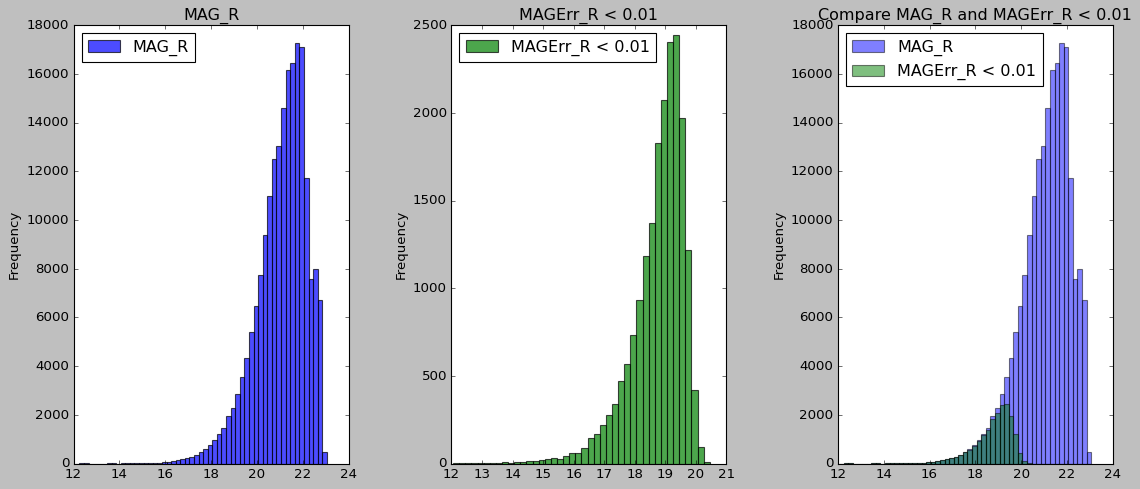

In [40]:
hor = 3
ver = 1

plt.style.use('classic')

fig = plt.figure(figsize=(14, 6), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)


binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


ax = fig.add_subplot(gs[0, 0])
bins0 = binarange(DF["MAG_R"], binsize)
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.7, label="MAG_R")
ax.set_title("MAG_R")
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 1])
bins1 = binarange(DF_Cut["MAG_R"], binsize)
ax = DF_Cut["MAG_R"].plot.hist(bins=bins1, color='green', alpha=0.7, label="MAGErr_R < %.2f" % mag_err)
ax.set_title("MAGErr_R < %.2f" % mag_err)
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 2])
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.5, label="MAG_R")
ax = DF_Cut["MAG_R"].plot.hist(bins=bins0, color='green', alpha=0.5, label="MAGErr_R < %.2f" % mag_err) # equal bins all mag r
ax.set_title("Compare MAG_R and MAGErr_R < %.2f" % mag_err)
plt.legend(loc='upper left')

plt.show